In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,ID,Timestamp,Value
0,1,2024-05-01 08:00:00,34
1,2,2024-05-01 08:10:00,35
2,2,2024-05-01 08:10:00,35
3,3,2024-05-01 08:20:00,36
4,4,2024-05-01 08:30:00,34


In [4]:
print(data.columns)

Index(['ID', 'Timestamp', 'Value'], dtype='object')


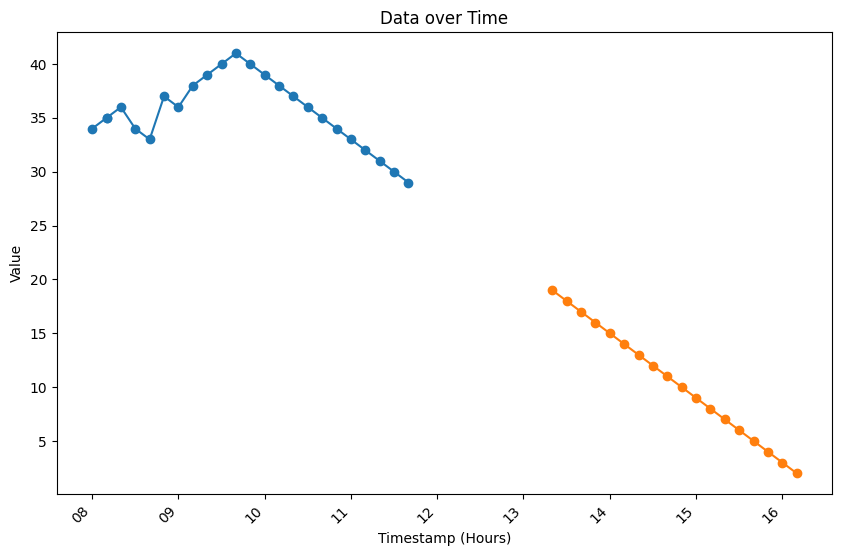

In [5]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

time_diff = data['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))
gap_indices = time_diff > pd.Timedelta(minutes=10)

plt.figure(figsize=(10, 6))

previous_index = 0
for index, gap in data[gap_indices].iterrows():
    plt.plot(data['Timestamp'][previous_index:index], data['Value'][previous_index:index], marker='o')
    previous_index = index + 1

plt.plot(data['Timestamp'][previous_index:], data['Value'][previous_index:], marker='o')


plt.xlabel('Timestamp (Hours)')
plt.ylabel('Value')
plt.title('Data over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H'))

plt.show()

In [6]:
def plot_time_series(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Timestamp'], data['Value'], marker='o')
    plt.xlabel('Timestamp (Hours)')
    plt.ylabel('Value')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H'))
    plt.show()

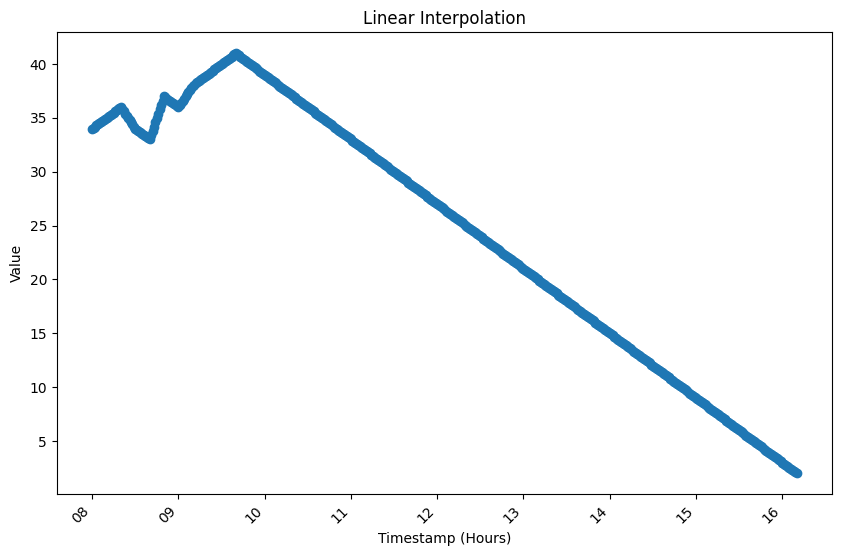

In [7]:
# Linear Interpolation

linear_interpolated_data = data.copy()
linear_interpolated_data.set_index('Timestamp', inplace=True)
resampled_linear_data = linear_interpolated_data.resample('1T').mean()
interpolated_linear_data = resampled_linear_data.interpolate(method='linear')
interpolated_linear_data.reset_index(inplace=True)
plot_time_series(interpolated_linear_data, 'Linear Interpolation')


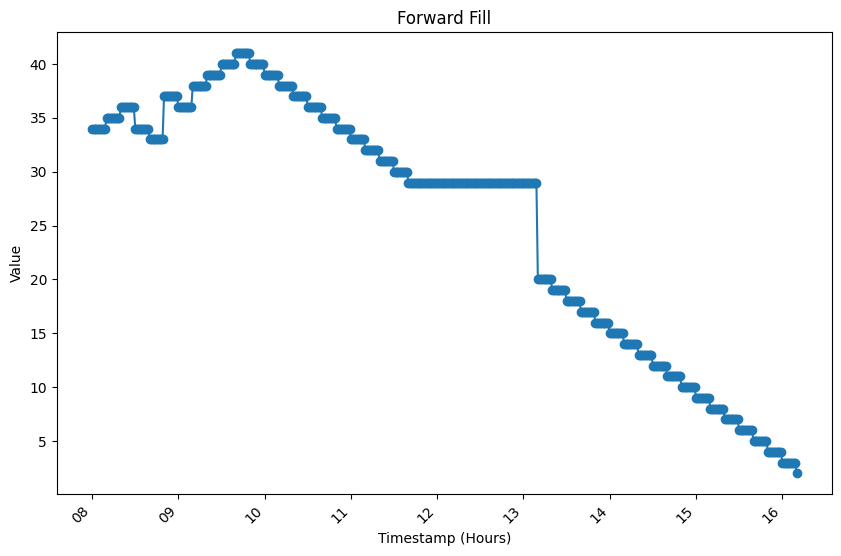

In [8]:
# Forwad Fill
ffill_data = data.copy()
ffill_data.set_index('Timestamp', inplace=True)
resampled_ffill_data = ffill_data.resample('1T').mean()
ffill_filled_data = resampled_ffill_data.ffill()
ffill_filled_data.reset_index(inplace=True)
plot_time_series(ffill_filled_data, 'Forward Fill')


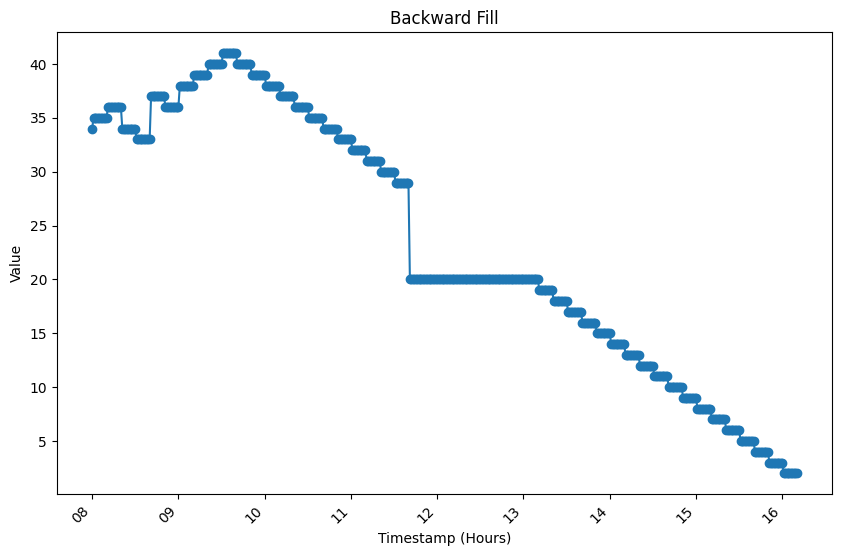

In [9]:
# Backward Fill

bfill_data = data.copy()
bfill_data.set_index('Timestamp', inplace=True)
resampled_bfill_data = bfill_data.resample('1T').mean()
bfill_filled_data = resampled_bfill_data.bfill()
bfill_filled_data.reset_index(inplace=True)
plot_time_series(bfill_filled_data, 'Backward Fill')


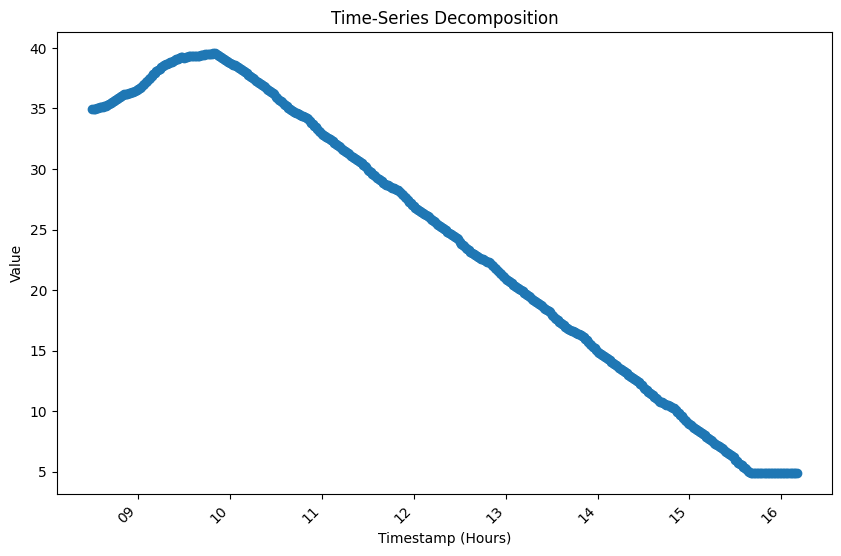

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_data = data.copy()
decomposed_data.set_index('Timestamp', inplace=True)
resampled_decomposed_data = decomposed_data.resample('1T').mean()
period = 60 
decomposition = seasonal_decompose(resampled_decomposed_data['Value'].interpolate(), model='additive', period=period)
decomposed_filled_data = decomposition.trend + decomposition.seasonal
decomposed_filled_data = decomposed_filled_data.interpolate()
decomposed_filled_data = pd.DataFrame(decomposed_filled_data, columns=['Value'])
decomposed_filled_data.reset_index(inplace=True)
plot_time_series(decomposed_filled_data, 'Time-Series Decomposition')



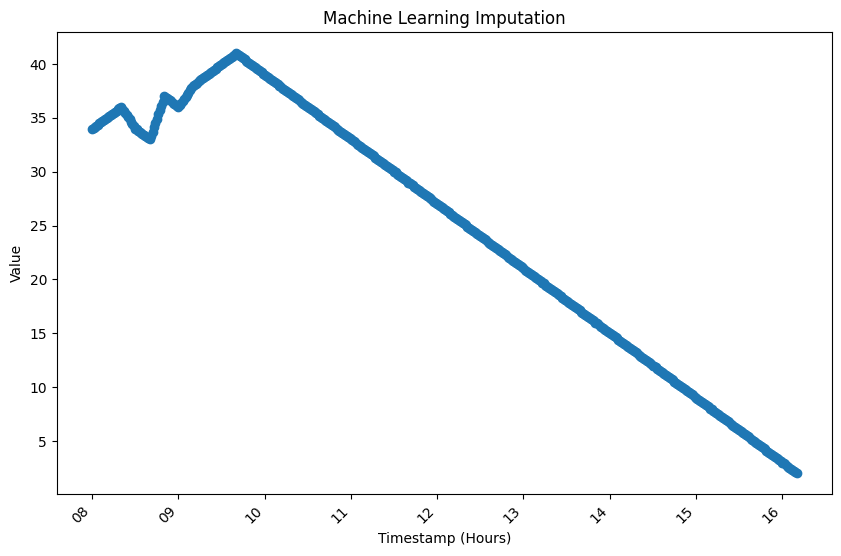

In [16]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

ml_data = data.copy()
ml_data.set_index('Timestamp', inplace=True)
resampled_ml_data = ml_data.resample('1T').mean()

train_data = resampled_ml_data.interpolate(method='linear')  # Temporarily fill gaps for training
X = np.arange(len(train_data)).reshape(-1, 1)
y = train_data['Value']

model = RandomForestRegressor()
model.fit(X, y)

predicted_values = model.predict(np.arange(len(resampled_ml_data)).reshape(-1, 1))
resampled_ml_data['Value'].fillna(pd.Series(predicted_values, index=resampled_ml_data.index), inplace=True)
resampled_ml_data.reset_index(inplace=True)
plot_time_series(resampled_ml_data, 'Machine Learning Imputation')
